In [4]:
import helpFunctions as hf 
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import math
import sympy 
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
import scipy
# import pylaimport math
from numpy import exp, arange
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show



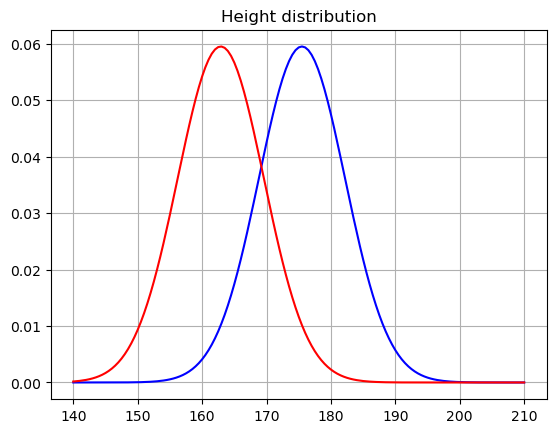

In [5]:
# Exercise 1.2
dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/Salami/data/'

mu_men = 175.5
mu_women = 162.9

def f(x,mu):
    return (1/(6.7*math.sqrt(2*math.pi)))*sympy.exp(-(1/2)*(1/6.7**2)*(x-mu)**2)

x = []
i = 140
while i <= 210:
    x.append(i)
    i+=0.5


heights_men = [f(i, mu_men) for i in x]
heights_women = [f(i, mu_women) for i in x]

plt.plot(x, heights_men, color="b")
plt.plot(x, heights_women, color="r")
plt.title("Height distribution")
plt.grid()
plt.show()

We are now interested in finding the value of x where:
f(x|175.5) ≥ f(x|162.9)
Find the solution graphical and by evaluation of the inequality.

In this inequality is x is the height at which it is more probable to to be male than female. Graphically, we can approximate this height to around 169 cm.

In [6]:
# Exercise 1.3
from scipy.optimize import minimize_scalar
print(f(170,mu_men)/f(170,mu_women))

# def func(x):
#     return f(x,mu_men)/f(x,mu_women) - 1

def func(x,mu):
    return (1/(6.7*math.sqrt(2*math.pi)))*np.exp(-(1/2)*(1/6.7**2)*(x-mu)**2)

# res = minimize_scalar(func)
# print(res.x)
# print(res.fun)

# x = Symbol('x')
# print(sympy.nonlinsolve([f(x,mu_men)-f(x,mu_women)], [x]))



1.25175791743968


In [4]:
def approx_intersect(min_initial, max_initial, num_vals, interval):
    x_vals = np.linspace(min_initial, max_initial, num_vals)
    for i in x_vals:
        if f(i, mu_men)/f(i, mu_women) <= 1+interval and  f(i, mu_men)/f(i, mu_women) >= 1-interval: return i
    return None

print(approx_intersect(168, 171, 6000, 0.0005))

169.19869978329723


In [7]:
#scipy.optimize.fsolve(lambda r: f(r,mu_men)-f(r,mu_women), 165)

def solveInter(func1,func2,incr,approx):
    i = 0
    r = True
    x = approx
    result = 0
    while r:
        set1 = func1(x)
        set2 = func2(x)
        if (set1 - set2) <= 0:
            r = True
            i += 1
        else:
            r = False
            result = x
        x += incr
    return result

def func1(x):
    return f(x,mu_men)

def func2(x):
    return f(x,mu_women)

print(solveInter(func1,func2,0.001,mu_women))


169.2000000000301


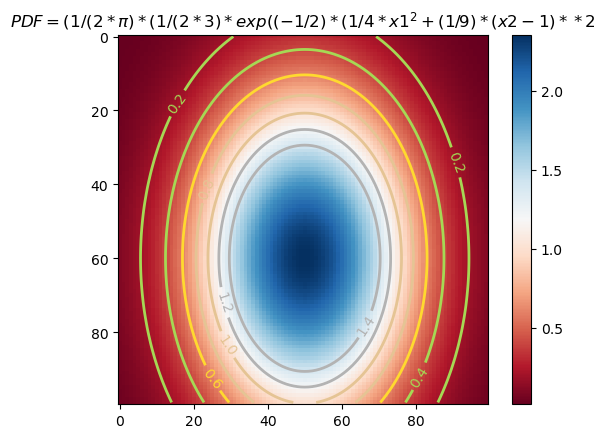

In [8]:
# Exercise 1.5

def z_func(x1, x2):
    return (1 / 2 * math.pi) * (1 / 2 * 3) * exp((-1 / 2) * (1 / 4 * x1 ** 2 + (1 / 9) * (x2 - 1) ** 2))


# def z_func(x,y):
# return (1-(x*2+y3))*exp(-(x2+y*2)/2)

x = arange(-5.0, 5.0, 0.1)
y = arange(-5.0, 5.0, 0.1)
X, Y = meshgrid(x, y)  # grid of point
Z = z_func(X, Y)  # evaluation of the function on the grid

im = imshow(Z, cmap=cm.RdBu)  # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(-1, 1.5, 0.2), linewidths=2, cmap=cm.Set2)
clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
colorbar(im)  # adding the colobar on the right
# latex fashion title
title('$PDF=(1/(2*\pi) * (1/(2*3) * exp((-1/2) * (1/4 * x1^2 + (1/9) * (x2 -1)**2$')
show()

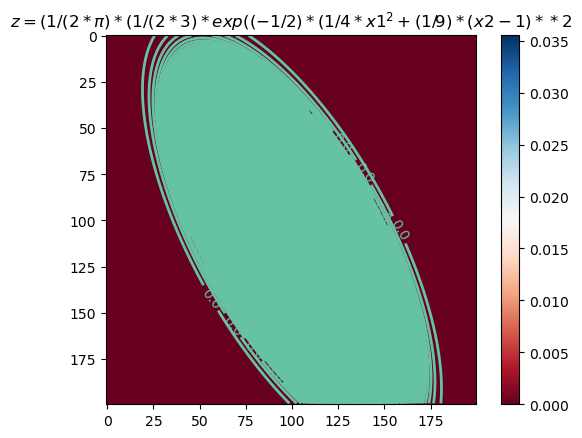

In [9]:
# Exercise 1.6
# plot joint pdf according to correlation coefficient
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show



def correlation(x1,x2,rho):
    poly = 1/4 * x1**2 - 2/6*rho*x1*(x2-1) + 1/9 * (x2 - 1)**2
    return 1/(2*math.pi) * 1/6 * 1/(math.sqrt(1-rho**2)) * exp(-1/2 * 1/(1-rho**2) * (poly) )

x = arange(-10, 10, 0.1)
y = arange(-10, 10, 0.1)
X, Y = meshgrid(x, y)  # grid of point
Z = correlation(X, Y,2/3)  # evaluation of the function on the grid

#print(X,Y,Z)
#exit()
im = imshow(Z, cmap=cm.RdBu)  # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(0, 1, 0.00001), linewidths=2, cmap=cm.Set2)
clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
colorbar(im)  # adding the colobar on the right
# latex fashion title
title('$z=(1/(2*\pi) * (1/(2*3) * exp((-1/2) * (1/4 * x1^2 + (1/9) * (x2 -1)**2$')
show()

(514, 514, 19)
(514, 514, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


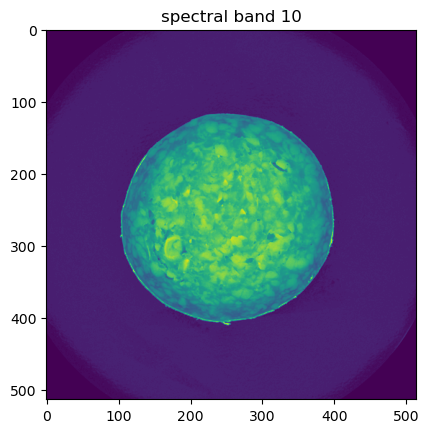

In [10]:
#plotting spectral bands

dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Salami/data/'
multiIm, annotationIm = hf.loadMulti('multispectral_day20.mat' , 'annotation_day20.png', dirIn)

print(multiIm.shape)
print(annotationIm.shape)

print(multiIm[:,:,6])

def showSpectral(band):
    plt.imshow(multiIm[:,:,band-1])
    plt.title("spectral band {}".format(band))
    plt.show()

showSpectral(10)


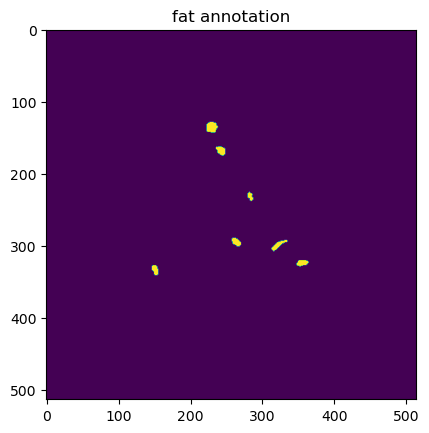

In [11]:
# Show annotations
## In each layer we have a binary image:
# 0 - background with salami
# 1 fat annotation
# 2 meat annotation

def showAnnotations(annotationIm,layer):
    plt.imshow(annotationIm[:,:,layer])
    title = "meat annotation"
    if(layer == 0): title = "background"
    if(layer == 1): title = "fat annotation"
    plt.title(title)
    plt.show()

showAnnotations(annotationIm,1)



In [12]:
# Compute threshold t for all spectral bands on day 1
dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Salami/data/'
multiIm, annotationIm = hf.loadMulti('multispectral_day01.mat' , 'annotation_day01.png', dirIn)


multiIm.shape

# showSpectral(1)
# print(multiIm[:,:,0])



(514, 514, 19)

In [13]:
# compute for one pixel
a,b = 250,250

# spectral band 1
band = 0
sp = multiIm[:,:,band]
print("spectral band 1 = " ,sp)

# compute mean
mu = np.mean(sp)
print("mu = " ,mu)

#compute standard deviation

std = np.std(sp)
print("std = ", std)

x = multiIm[a,b,0]
print("x = ", x)

# simple threshold:

if x >= mu:
    print("x >= t -> x in class C1")
else:
    print("x < t -> x in class C2")

spectral band 1 =  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mu =  22.552313433965693
std =  9.209704104887187
x =  25
x >= t -> x in class C1


In [14]:
# Generalise 
# array of multiple means - means for each spectral band
mumu = []
for i in range(len(multiIm[0,0,:])):
    mumu.append(np.mean(multiIm[:,:,i]))
# print(mumu)
print("dimensions of multiple means array = ",len(mumu))
# print(mumu.shape)

#xa : is the pixel value in dimension a
#xb : is the pixel value in dimension b

# covariance assuming equal for both classes
# number of spectral bands
n = len(mumu)
# number of pixels per spectral band
m = len(multiIm[:,0,0])
print("m = ",m)
cov = np.zeros(shape=(n,n))

for a in range(n):
    for b in range(n):
        cov[a][b] = 1/(m**2 - 1) * sum((multiIm[:,:,a].flatten()-mumu[a])*(multiIm[:,:,b].flatten()-mumu[b]))


print("first four columns of the covariance matrix : ")
print(cov[0:4,0:4])
print(cov.shape)

dimensions of multiple means array =  19
m =  514
first four columns of the covariance matrix : 
[[ 84.81897075  70.62763378  96.7718079  104.3571145 ]
 [ 70.62763378  61.34665886  81.90352166  87.82822318]
 [ 96.7718079   81.90352166 111.9532017  120.31994522]
 [104.3571145   87.82822318 120.31994522 129.83937198]]
(19, 19)


In [15]:
# considering difference in classes

# extract meat pixels
ann = 2
[clPix, r, c] = hf.getPix(multiIm,annotationIm[:,:,ann])

print(len(clPix[:,0]))

a,b = r[5],c[5]

if a in r and b in c:
    print(f"cell {a},{b} is a meat cell")
else:
    print(f"cell {a},{b} is not a meat cell")


# mean vectors
mu_meat = []
n_meat = len(clPix[0])
m_meat = len(clPix[:,0])
for i in range(n):
    mu_meat.append(np.mean(clPix[:,i]))

print("mu_meat = ", mu_meat)
print(len(mu_meat))


969
cell 184,273 is a meat cell
mu_meat =  [12.87203302373581, 6.718266253869969, 11.006191950464396, 12.898864809081527, 15.111455108359133, 16.75438596491228, 16.91434468524252, 19.67595459236326, 39.880288957688336, 46.48297213622291, 51.11145510835913, 57.791537667698655, 63.431372549019606, 63.319917440660475, 61.13209494324045, 55.08565531475748, 53.450980392156865, 43.86480908152735, 1.2745098039215685]
19


In [35]:
# consider fat cells
ann = 1
[clPix, r, c] = hf.getPix(multiIm,annotationIm[:,:,ann])

print(len(clPix[:,0]))
x = multiIm[a,b,:]

if a in r and b in c:
    print(f"cell {a},{b} is a fat cell")
else:
    print(f"cell {a},{b} is not a fat cell")

c,d = r[5],c[5]
y = multiIm[c,d,:]

# mean vectors
mu_fat = []
n_fat = len(clPix[0])
m_fat = len(clPix[:,0])
for i in range(n):
    mu_fat.append(np.mean(clPix[:,i]))

print("mu_fat = ", mu_fat)
print(len(mu_fat))

756
cell 184,273 is not a fat cell
mu_fat =  [34.72486772486773, 27.404761904761905, 38.9973544973545, 41.923280423280424, 44.324074074074076, 45.198412698412696, 43.08201058201058, 44.32936507936508, 59.82539682539682, 63.83994708994709, 66.70370370370371, 71.04629629629629, 74.92460317460318, 74.61111111111111, 72.43386243386243, 67.8941798941799, 66.88359788359789, 59.310846560846564, 1.2989417989417988]
19


In [18]:
# Decision using simple threshold
# simple threshold - mean of meat and fat pixels
# do we have to compare the mean of x with the mean of all meat/ fats or just the value of 1 spectral band?
# print()
# x is a meat cell
if np.mean(x) >= np.mean(mu_meat):
    print("x >= t_meat -> x is meat")
if np.mean(x) >= np.mean(mu_fat):
    print("x >= t_fat -> x is fat")



x >= t_meat -> x is meat


In [37]:
# Decision using simple threshold
# simple threshold - comparing differences to mean
mx = np.mean(x)
if abs(np.mean(mu_meat) - mx) < abs(np.mean(mu_fat) - mx):
    print("x is meat")
else:
    print("x is fat")


my = np.mean(y)
if abs(np.mean(mu_meat) - my) < abs(np.mean(mu_fat) - my):
    print("y is meat")
else:
    print("y is fat")


x is meat
y is fat


In [20]:
# compute PDF for f_1 (fat annotation)

def f_fat(x):
    det = np.linalg.det(cov)
    fact = 1/(2*math.pi*math.sqrt(det))
    mat = np.dot(np.transpose(x-mu_fat),np.linalg.inv(cov))
    mat = np.dot(mat,(x-mu_fat))

    return fact*math.exp(-1/2 * mat)


x = multiIm[a,b,:]


print(f_fat(x))



9.548067519649511e-17


In [22]:
# compute PDF for f_1 (fat annotation)

def f_meat(x):
    det = np.linalg.det(cov)
    fact = 1/(2*math.pi*math.sqrt(det))
    mat = np.dot(np.transpose(x-mu_meat),np.linalg.inv(cov))
    mat = np.dot(mat,(x-mu_meat))

    return fact*math.exp(-1/2 * mat)



x = multiIm[a,b,:]

print(f_meat(x))

1.1796347689699299e-05


In [23]:
# Decision using normal distribution 
# expected: x is meat
if f_meat(x) > f_fat(x):
    print("x is meat")
else:
    print("x is fat")

x is meat


# Threshold value for a single spectral band
Using the mean values for meat and fat in a single spectral band, we can construct a threshold value. 
This can be done by simple comparison to the means, difference to the mean or by modelling through a simple 1D normal distribution.
For two normal distributions with the same standard deviation but different means, the threshold value can be computed as:
$$
\frac{f(x|\mu_1)}{f(x|\mu_2)}
$$

The standard deviation is computed over all values.

In [24]:
# Gaussian distribution
def Gauss(x,mu,s):
    return 1/(s*math.sqrt(2*math.pi)) * np.exp(-1/2 * 1/s**2 * (x-mu)**2)

In [31]:
# for spectral band 1
# compute std
band = 0

# fat test pixel



s = np.std(multiIm[:,:,band])
mu_1 = mu_meat[band]
mu_2 = mu_fat[band] 

def func1(x):
    return Gauss(x,mu_1,s)

def func2(x):
    return Gauss(x,mu_2,s)

t = solveInter(func1,func2,0.001,mu_1)

if(mu_1 < mu_2):
    print("mu_1 < mu_2")
else:
    print("mu_1 >= mu_2")



mu_1 < mu_2


In [60]:
# check test pixel
def checkSimple(x,t):
    if x < t:
        # meat
        return 0
    else:
        # fat
        return 1


In [61]:
def checkSimplePrint(x,t):
    if x < t:
        print("x is meat")
    else:
        print("x is fat")


## Computing the error rate for the simple approximation of each error space
We compute how many pixels that were annotated as meat pixels are classified as meat by the simple classification model, similarly for fat pixels

In [63]:
# computing error 

# fat pixels
ann = 1
[clPixFat, rFat, cFat] = hf.getPix(multiIm,annotationIm[:,:,ann])

# meat pixels
ann = 2
[clPixMeat, rMeat, cMeat] = hf.getPix(multiIm,annotationIm[:,:,ann])


fatPixels = len(rFat)
meatPixels = len(rMeat)

# count classified pixels
bandErrorFat = []
bandErrorMeat = []

for band in range(len(clPixMeat[0])):
    fatsClassification = 0
    for i in range(fatPixels):
        f = multiIm[rFat[i],cFat[i],band]
        fatsClassification += checkSimple(f,t)


    meatClassification = 0
    for i in range(meatPixels):
        m = multiIm[rMeat[i],cMeat[i],band]
        meatClassification += abs(1-checkSimple(m,t))

    bandErrorFat.append(fatsClassification/fatPixels)
    bandErrorMeat.append(meatClassification/meatPixels)


# print(f"Percent correctly classified fat = {fatsClassification/fatPixels * 100}%")
# print(f"Percent correctly classified meat = {meatClassification/meatPixels * 100}%")

print(bandErrorMeat)
print(bandErrorFat)



len(clPixFat[:,0])





[0.41589267285861714, 1.0, 0.7853457172342622, 0.4613003095975232, 0.10732714138286893, 0.02063983488132095, 0.013415892672858616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[1.0, 0.9947089947089947, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]


756